## Import 

In [1]:
# Neural Network
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import keras

# Image processing
import imutils
from imutils.object_detection import non_max_suppression

import numpy as np
import pickle
import os
import argparse

# Computer Vision
import cv2

# Graphing
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Selective Search Region Proposals
- Define the maximum number of Selective Search region proposals to be utilized for training and inference

In [2]:
# define the number of max proposals used when running selective
# search for (1) gathering training data and (2) performing inference
max_proposals = 2000
max_proposals_infer = 200

## Max Number of Positive and Negative Regions

In [3]:
# define the maximum number of positive and negative images to be
# generated from each image
max_pos = 30
max_neg = 10

## Initializing Dimension Input
- i.e. Image input

In [4]:
# initialize the input dimensions to the network
image_input = (300, 300)

# define the path to the output model
model_path = "model_3.hdf5"

# define the minimum probability required for a positive prediction
# (used to filter out false-positive predictions)
min_prob = 0.80

## Loading Images

In [2]:
# Alters pictures
image_gen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None)

In [3]:
# Loading Images
image_gen = image_gen.flow_from_directory(
    "Data-Images",
    target_size=(300, 300),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=2591,
    shuffle=True,
    seed=123,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    interpolation='nearest')

Found 2453 images belonging to 3 classes.


In [4]:
# Image classes
image_gen.class_indices

{'Assault Rifle': 0, 'Handgun': 1, 'No Firearm': 2}

In [5]:
# Image shape
image_gen.image_shape

(300, 300, 3)

## Separating To Images and Labels

In [6]:
images, labels = next(image_gen)

In [7]:
images.shape

(2453, 300, 300, 3)

In [8]:
labels.shape

(2453, 3)

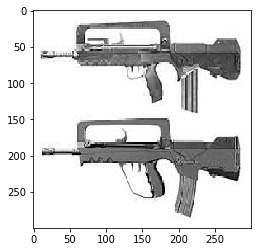

In [9]:
plt.imshow(images[0])

In [15]:
# load the our fine-tuned model and label binarizer from disk
print("[INFO] loading model...")
model_path = "model_3.hdf5"
model = load_model(model_path)

# run selective search on the image to generate bounding box proposal
# regions
print("[INFO] running selective search...")
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(images)
ss.switchToSelectiveSearchFast()
rects = ss.process()

[INFO] loading model...
[INFO] running selective search...


In [11]:
cv2.imshow(images[0], 3)

SystemError: <built-in function imshow> returned NULL without setting an error